In [1]:
#  Predicts Dogs and cats,by loading a Saved Model and Weight
#  Takes images from the output directory and sorts them out into cats and dogs

In [2]:
import tensorflow as tf 
import numpy as np 
import scipy 
import h5py 
import os 
import shutil
import fnmatch
import matplotlib.pyplot as plt 
%matplotlib inline

from tensorflow.python.keras.preprocessing import image
from tensorflow.python.keras import models
from tensorflow.python.keras.models import Sequential,model_from_json
from tensorflow.python.keras import backend as K
from numpy.random import seed
from shutil import copyfile
from IPython.display import display
tf.set_random_seed(1)
seed(1)

In [10]:
#Define Paths
STARTDIR='C:\\data\\clothes\\'
#userCreatedImages_dir = os.path.join(STARTDIR,'UserData\\')
userCreatedImages_dir = os.path.join(STARTDIR,'Adversarialexample\\')
model_dir = os.path.join(STARTDIR,'model_ourclothes.json')
weights_dir=os.path.join(STARTDIR,'weights_ourclothes.h5')
image_width, image_height = 150, 150
input_shape = (image_width, image_height, 3) 
labels = ['hat', 'pant', 'shirt', 'shoes', 'skirt', 'socks']

C:\data\clothes\Adversarialexample\advEx_advEx_advEx_userskirt_002.jpg
pant


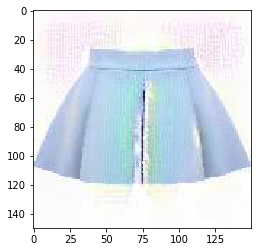

C:\data\clothes\Adversarialexample\advEx_advEx_userskirt_002.jpg
pant


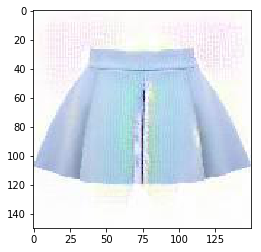

C:\data\clothes\Adversarialexample\advEx_userskirt_002.jpg
shirt


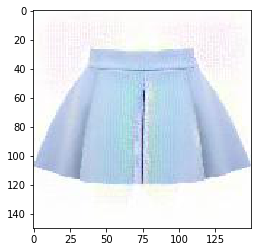

C:\data\clothes\Adversarialexample\userskirt_002 - Copy.jpg
skirt


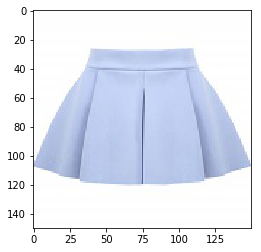

C:\data\clothes\Adversarialexample\userskirt_002.jpg
skirt


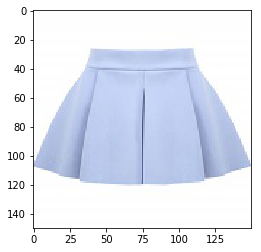

In [11]:
json_file = open(model_dir, 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights(weights_dir)

files = os.listdir(userCreatedImages_dir)
    
for file in files:
        fullFileName=userCreatedImages_dir  + file
        t_image= image.load_img(fullFileName )
        test_image = image.load_img(fullFileName, target_size=(image_height, image_width))
        test_image = image.img_to_array(test_image)
        test_image /= 255.0
        test_image = np.expand_dims(test_image, axis=0)
        y_prob = loaded_model.predict(test_image)
        predictions = y_prob.argmax(axis=-1)
        print(fullFileName)
        print(labels[predictions[0]])
        plt.imshow(t_image)
        plt.show()  
        